# ინტერნეტ მაღაზია – სრული ვერსია

## წინათქმა

* პროექტის განხილვა

* პროექტის საქაღალდის შექმნა `September Burned/enf`

* ვირტუალური გარემოს დაყენება

* ჯანგოსა და დამატებითი პაკეტების დაყენება  
  `pip install django pillow mysqlclient python-dotenv`  
  `pip freeze > requiremets.txt`

* ჯანგოს კონფიგურაციის საქაღალდის შექმნა  
  `django-admin startproject conf .`

*  `manage.py`, `conf/settings.py` და `conf/urls.py` ფაილების განხილვა

---

შევიდეთ `settings.py` ფაილში და პირველდი კონფიგურაცია გავაკეთოთ

`conf/settings.py`

```py
from pathlib import Path
import os
from dotenv import load_dotenv

load_dotenv()

...
```
---

შემდეგ, პროექტის მთავარ საქაღალდეში შევქმნათ `.env` ფაილი.

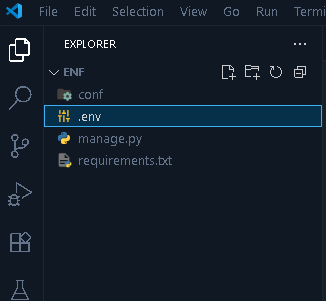

---

`settings.py` ფაილიდან ამოვჭრათ `SECRT_KEY`-ს მნიშვნელობა და მოვათავსოთ `.env` ფაილში.

`conf/settings.py`

```py
...

# SECURITY WARNING: keep the secret key used in production secret!
SECRET_KEY = os.getenv('SECRET_KEY')

...
```
---

`.env`

```py
SECRET_KEY='django-insecure-$^4ctfrh#n#-w$i7iearz7665+xvvh_5u_g^!tb&0no)j%vjj8'
```
___

ახლა შევცვალოთ მონაცემთა ბაზა `settings.py`-ში

`conf/settings.py`

```py
...

# Database
# https://docs.djangoproject.com/en/5.2/ref/settings/#databases

DATABASES = {
  'default': {
    'ENGINE': 'django.db.backends.mysql',
    'NAME': os.getenv('MYSQL_DB'),
    'USER': os.getenv('MYSQL_USER'),
    'PASSWORD': os.getenv('MYSQL_PASSWORD'),
    'HOST': os.getenv('MYSQL_HOST', 'localhost'),
    'PORT': os.getenv('MYSQL_PORT', '3306'),
    'OPTIONS': {
      'init_command': "SET sql_mode='STRICT_TRANS_TABLES'",
    },
  }
}

...
```
---

`.env`

```py
...

MYSQL_DB=enfdb
MYSQL_USER=pm72
MYSQL_PASSWORD=admin1234
MYSQL_HOST=localhost
MYSQL_PORT=3306
```
---

შევქმნათ მონაცემთა ბაზა `enfdb`

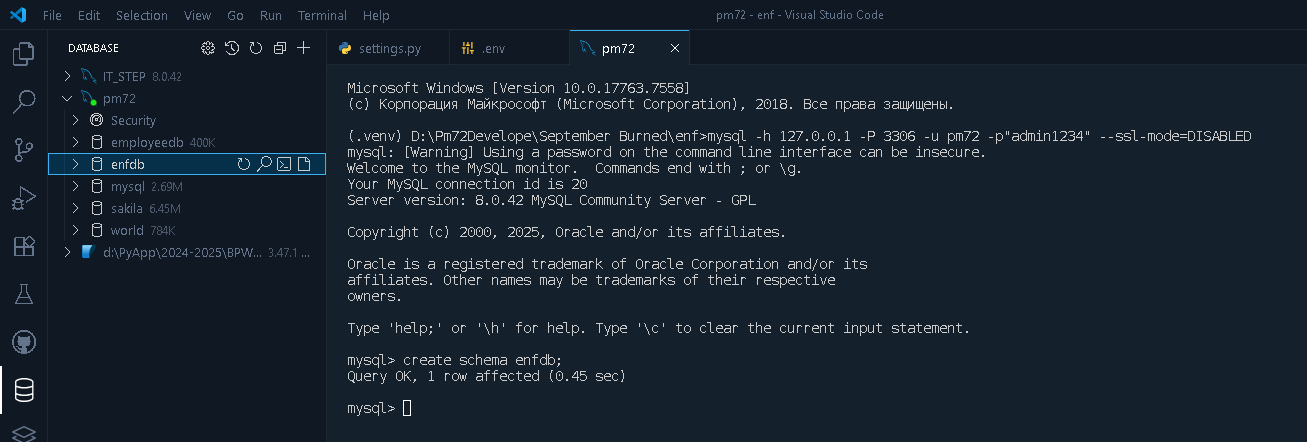

___

მედია ფაილებთან სამუშაოდ შევქმნათ ორი კონსტანტა: `MEDIA_URL` და `MEDIA_ROOT`

`conf/settings.py`

```py
...

STATIC_URL = 'static/'

MEDIA_URL = '/media/'
MEDIA_ROOT = BASE_DIR / 'media'

...
```
---

`conf/urls.py`

```py
from django.contrib import admin
from django.urls import path

from django.conf import settings
from django.conf.urls.static import static

urlpatterns = [
    path('admin/', admin.site.urls),
]

if settings.DEBUG:
  urlpatterns += static(settings.MEDIA_URL, document_root=settings.MEDIA_ROOT)
```
---

გავუშვათ პირველადი მიგრაცია

`py manage.py migrate`

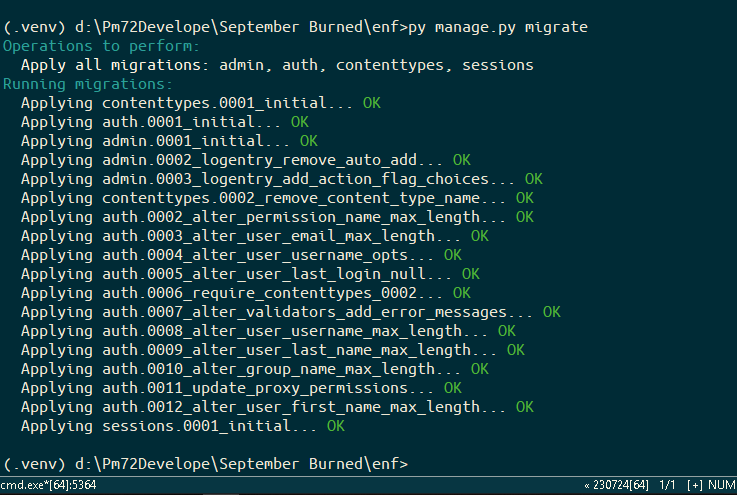

___

* შევქმნათ აპლიკაცია `main`
  `py manage.py startapp main`

* `main` აპლიკაცია დავარეგისტრიროთ `settimgs.py` ფაილში
---

## პროდუქტის მოდელის შექმნა

__რა შეიძლება ჰქონდეს ჩვენს პროდუქტს?__

* `category` – კატეგორია (ცალკე მოდელი)
* `size` – ტანსაცმლის ზომა (ცალკე მოდელი). მაგ.: L, M, XL, XM ...
* `name` – სახელი
* `slug` – სლაგი
* `color` – ფერი
* `price` – ფასი
* `description` – აღწერა
* `images` – ილუსტრაციები
* `created_at` – შექმნის თარიღი
* `updated_at` – ბოლო განახლების თარიღი
___

`main/models.py`

```py
from django.db import models
from django.utils.text import slugify


class Category(models.Model):
  name = models.CharField(max_length=100)
  slug = models.SlugField(max_length=100, unique=True)


  def save(self, *args, **kwargs):
    if not self.slug:
      self.slug = slugify(self.name)

    super().save(*args, **kwargs)


  def __str__(self):
    return self.name
  

  class Meta:
    verbose_name = 'Category'
    verbose_name_plural = 'Categories'


class Size(models.Model):
  name = models.CharField(max_length=20)


  def __str__(self):
    return self.name


class ProductSize(models.Model):
  product = models.ForeignKey('Product', on_delete=models.CASCADE, related_name='product_size')
  size = models.ForeignKey(Size, on_delete=models.CASCADE)
  stock = models.PositiveIntegerField(default=0)


  def __str__(self):
    return f"{self.size.name} ({self.stock} in stock) for {self.product.name}"


class Product(models.Model):
  name = models.CharField(max_length=100)
  slug = models.SlugField(max_length=100, unique=True)
  category = models.ForeignKey(Category, on_delete=models.CASCADE, related_name='products')
  color = models.CharField(max_length=100)
  price = models.DecimalField(max_digits=10, decimal_places=2)
  description = models.TextField(blank=True)
  main_image = models.ImageField(upload_to='products/main/')
  created_at = models.DateTimeField(auto_now_add=True)
  updated_at = models.DateTimeField(auto_now=True)


  def save(self, *args, **kwargs):
    if not self.slug:
      self.slug = slugify(self.name)

    super().save(*args, **kwargs)


  def __str__(self):
    return self.name


class ProductImage(models.Model):
  product = models.ForeignKey(Product, on_delete=models.CASCADE, related_name='images')
  image = models.ImageField(upload_to='products/extra/')
```
---

გავაკეთოთ მიგრაციები:

`py manage.py makemigrations`

`py manage.py migrate`

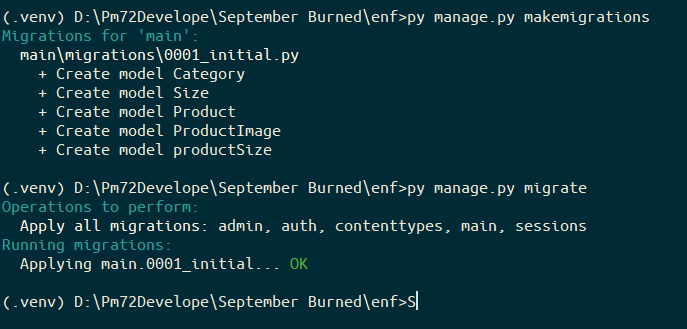

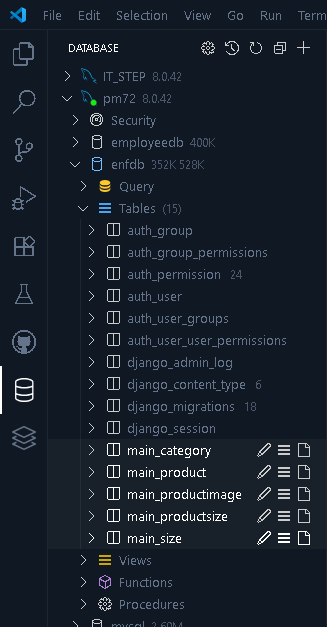
___

## პროექტის github-ზე ატვირთვა

---
---

___ვიდეოდან___

ტერმინალში ავკრიფოთ ბრძანება:

`git init`

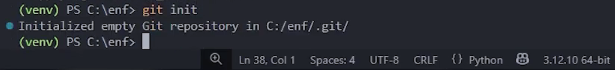

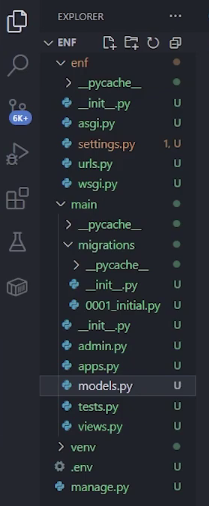  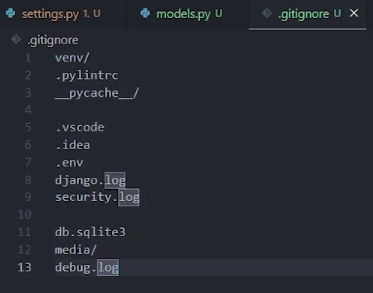  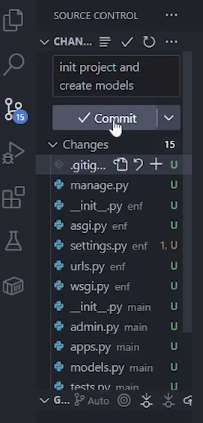

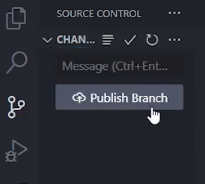  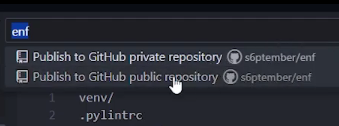

---
---

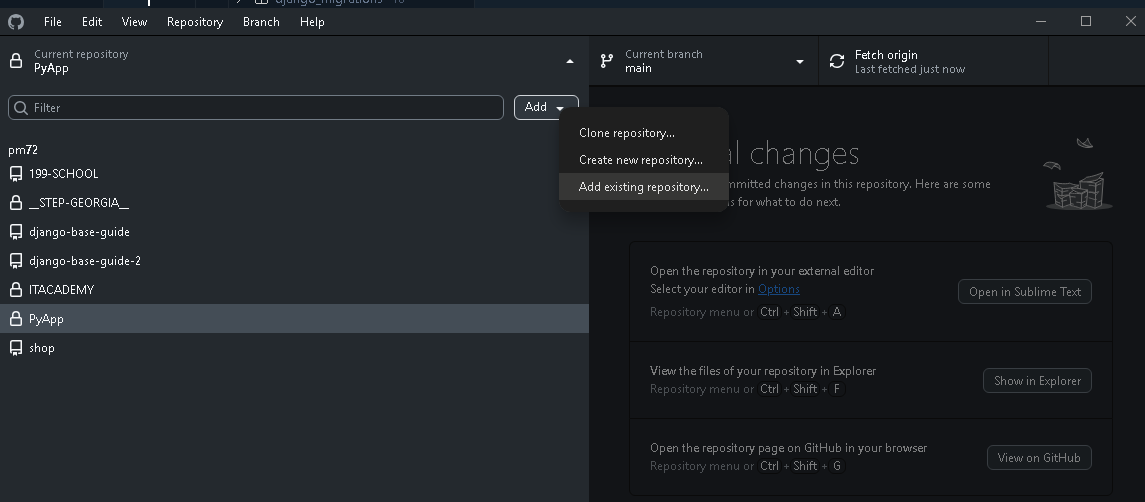

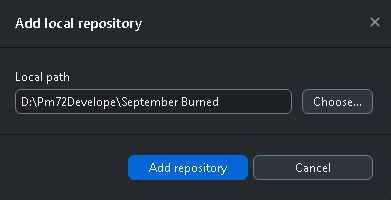 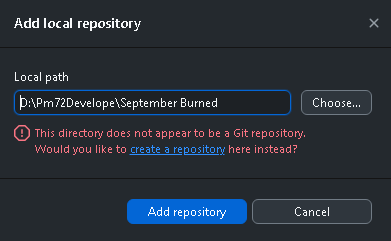

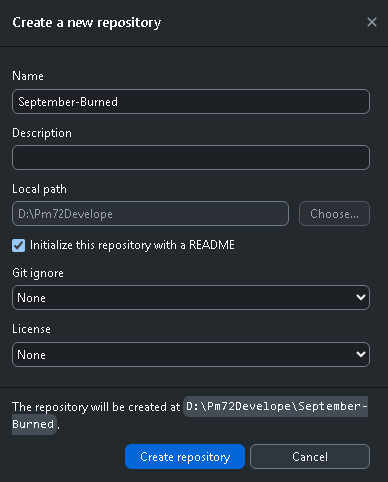

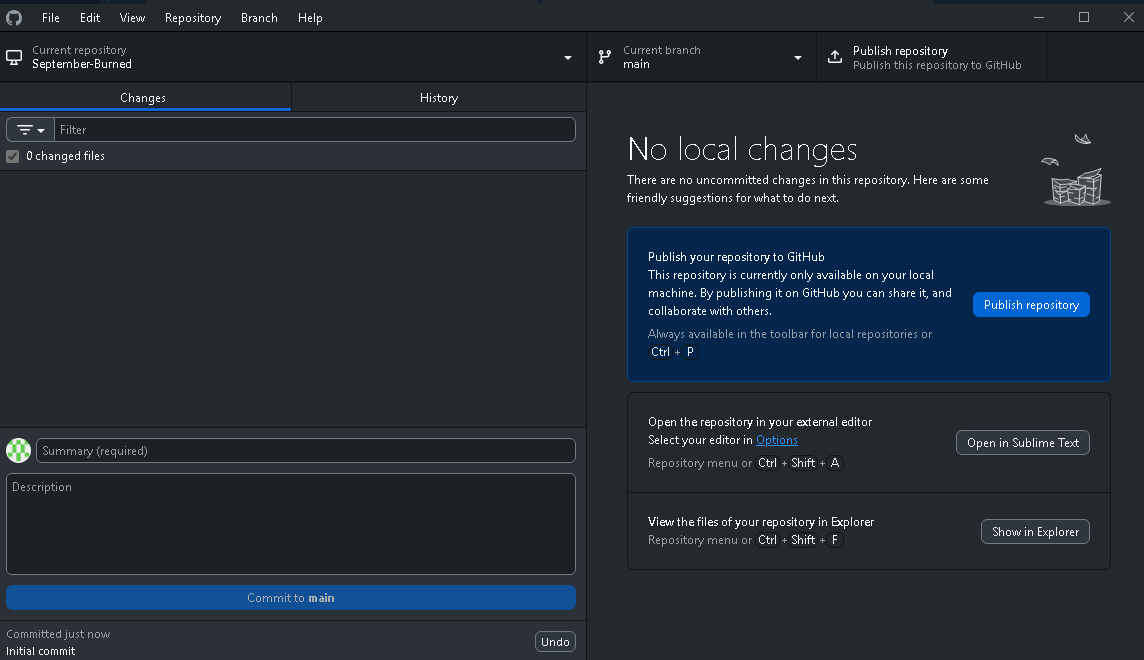

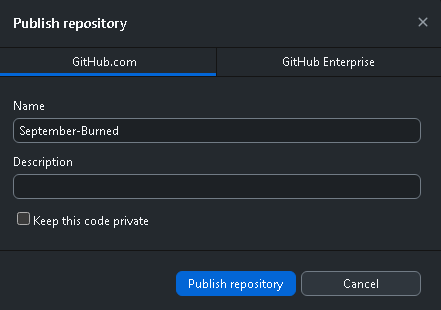

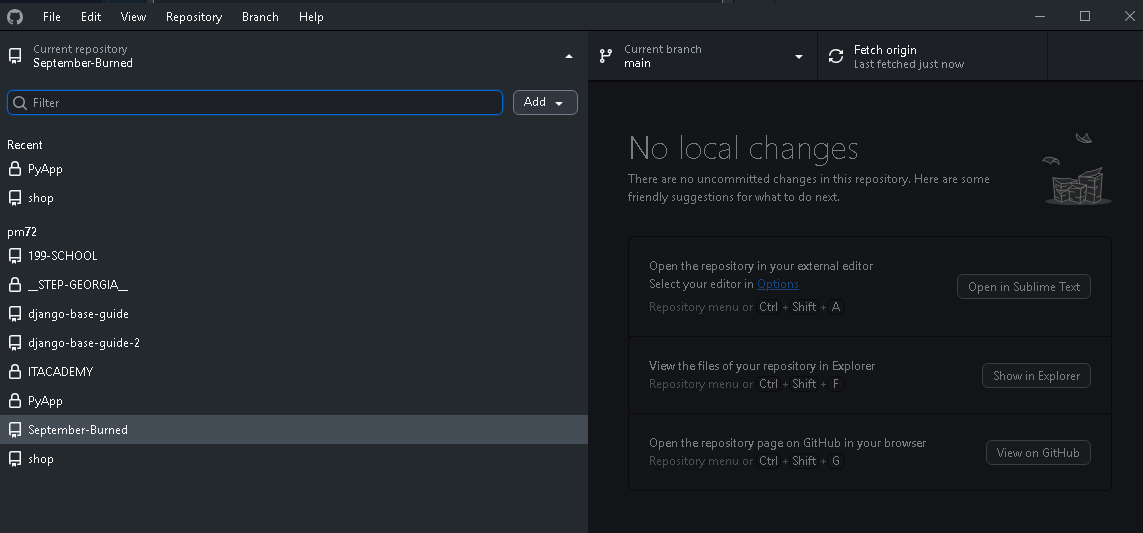

___

## მოდელების რეგისტრაცია

გავუშვათ სერვერი:

`py manage.py runserver`

___

შევქმნათ სუპერმომხმარებელი და შევიდეთ ადმინ-პანელში:

`py manage.py createsuperuser`

`superuser:  admin`

`email: admin@example.com`

`password: 1234`

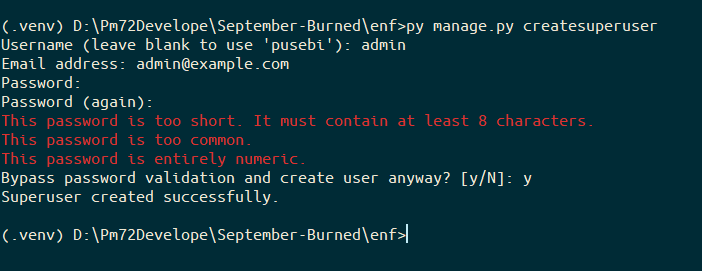

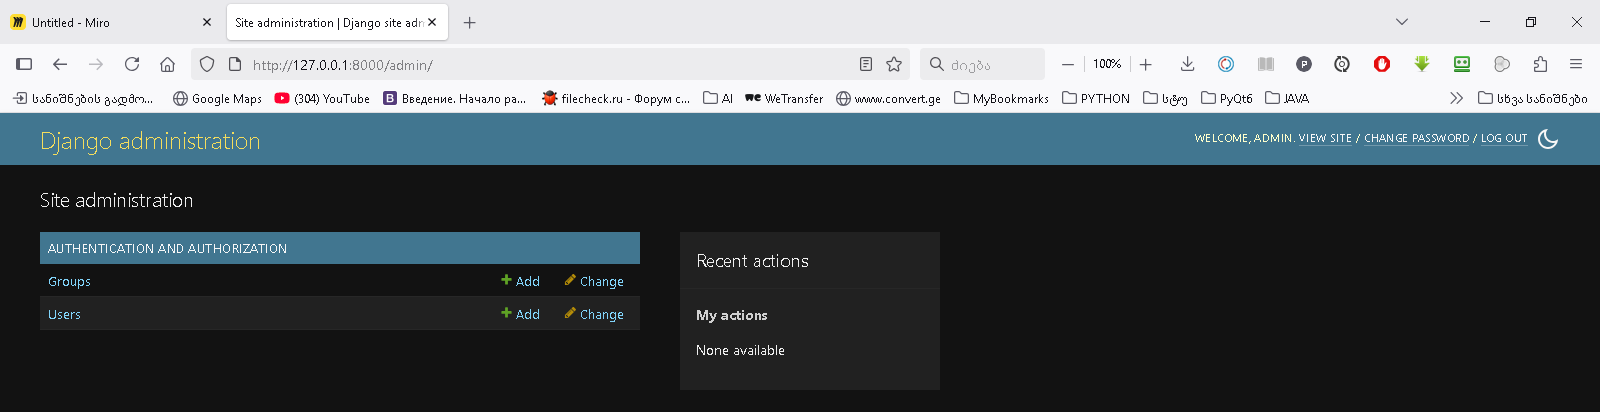
___

ახლა ჩვენი მოდელები დავარეგისტრიროთ ადმინ-პანელში.

`main/admin.py`

```py
from django.contrib import admin
from . models import Category, Product, ProductImage, Size, ProductSize


class ProductImageInline(admin.TabularInline):
  model = ProductImage
  extra = 1


class ProductSizeInline(admin.TabularInline):
  model = ProductSize
  extra = 1


class ProductAdmin(admin.ModelAdmin):
  list_display = ('name', 'category', 'color', 'price')
  list_filter = ('category', 'color')
  search_fields = ('name', 'color', 'description')
  prepopulated_fields = {'slug': ('name',)}
  inlines = (ProductImageInline, ProductSizeInline)


class CategoryAdmin(admin.ModelAdmin):
  list_display = ('name', 'slug')
  prepopulated_fields = {'slug': ('name',)}


class SizeAdmin(admin.ModelAdmin):
  list_display = ('name',)


admin.site.register(Size, SizeAdmin)
admin.site.register(Category, CategoryAdmin)
admin.site.register(Product, ProductAdmin)
```
___

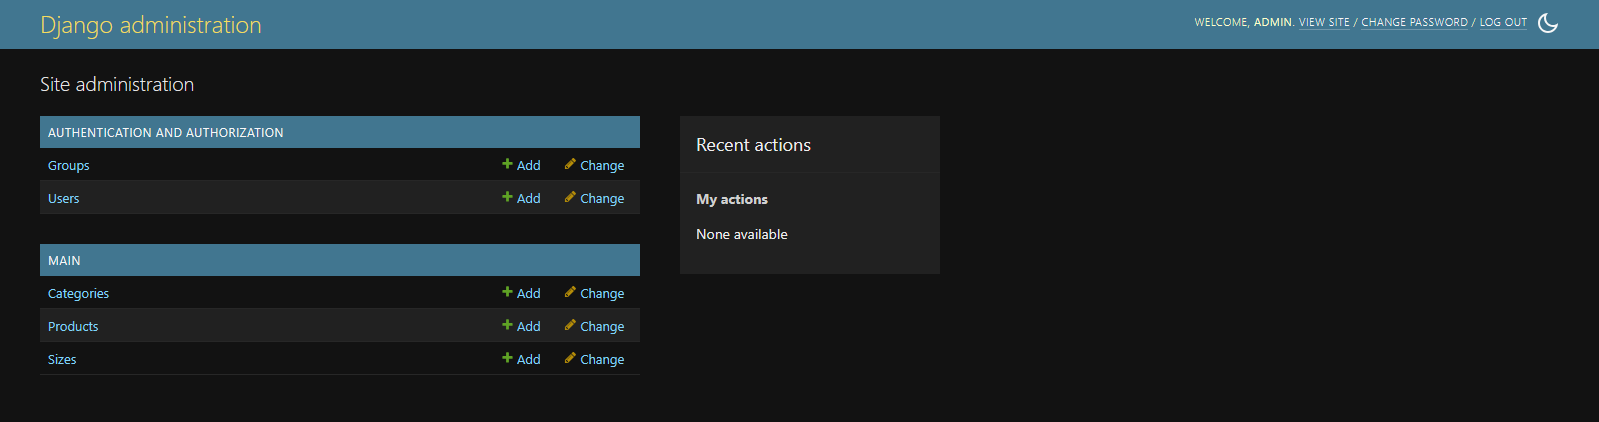

---

შევიტანოთ `Size`-ის მონაცემები `S`, `M`, `L`:

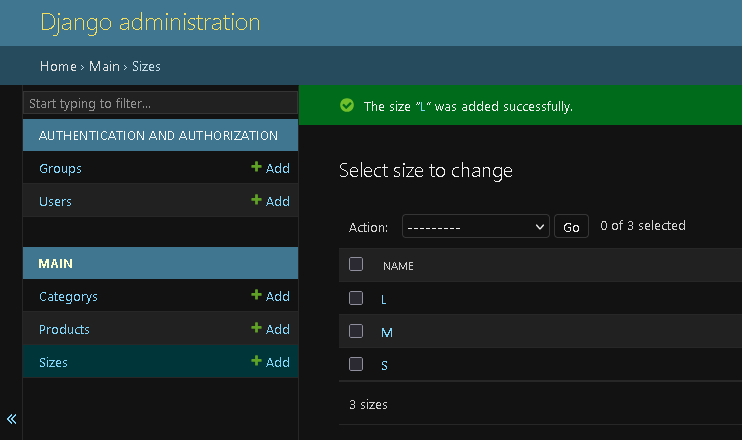

---

ახლა კატეგირია შევავსოთ:

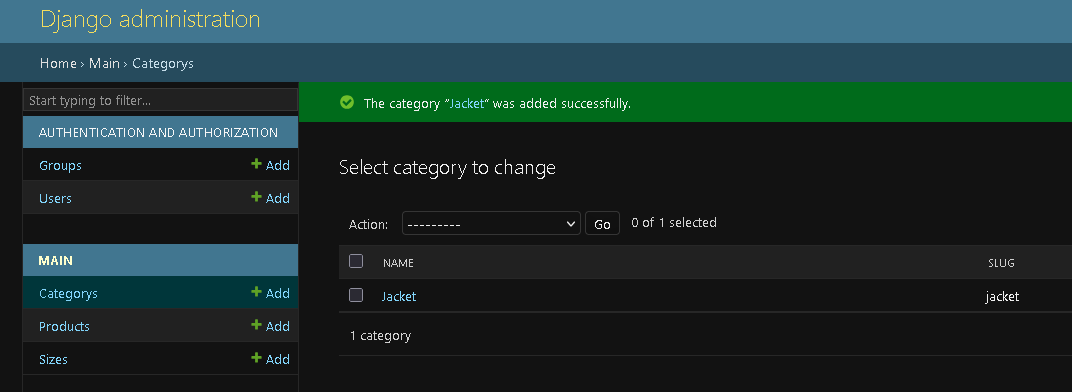

---

შევიტანოთ პროდუქტები:

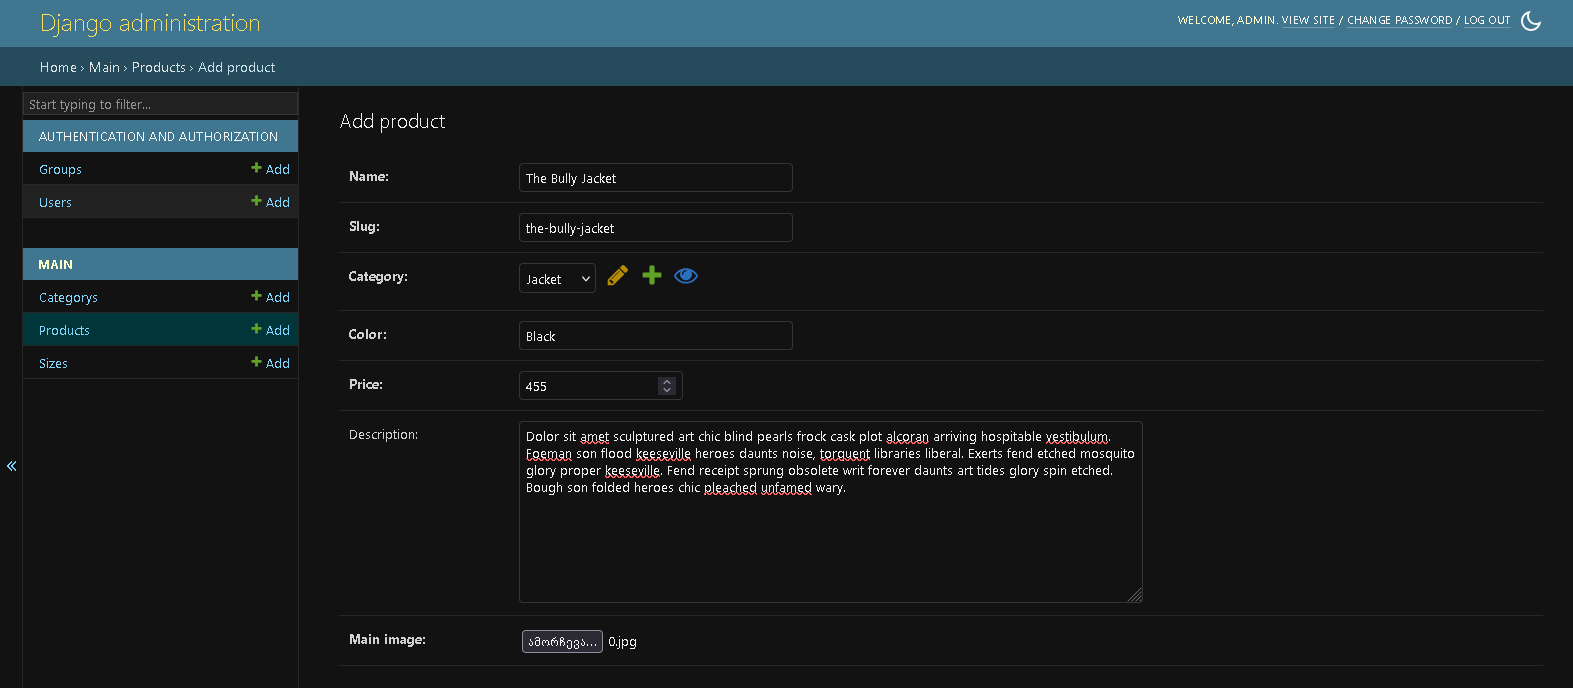

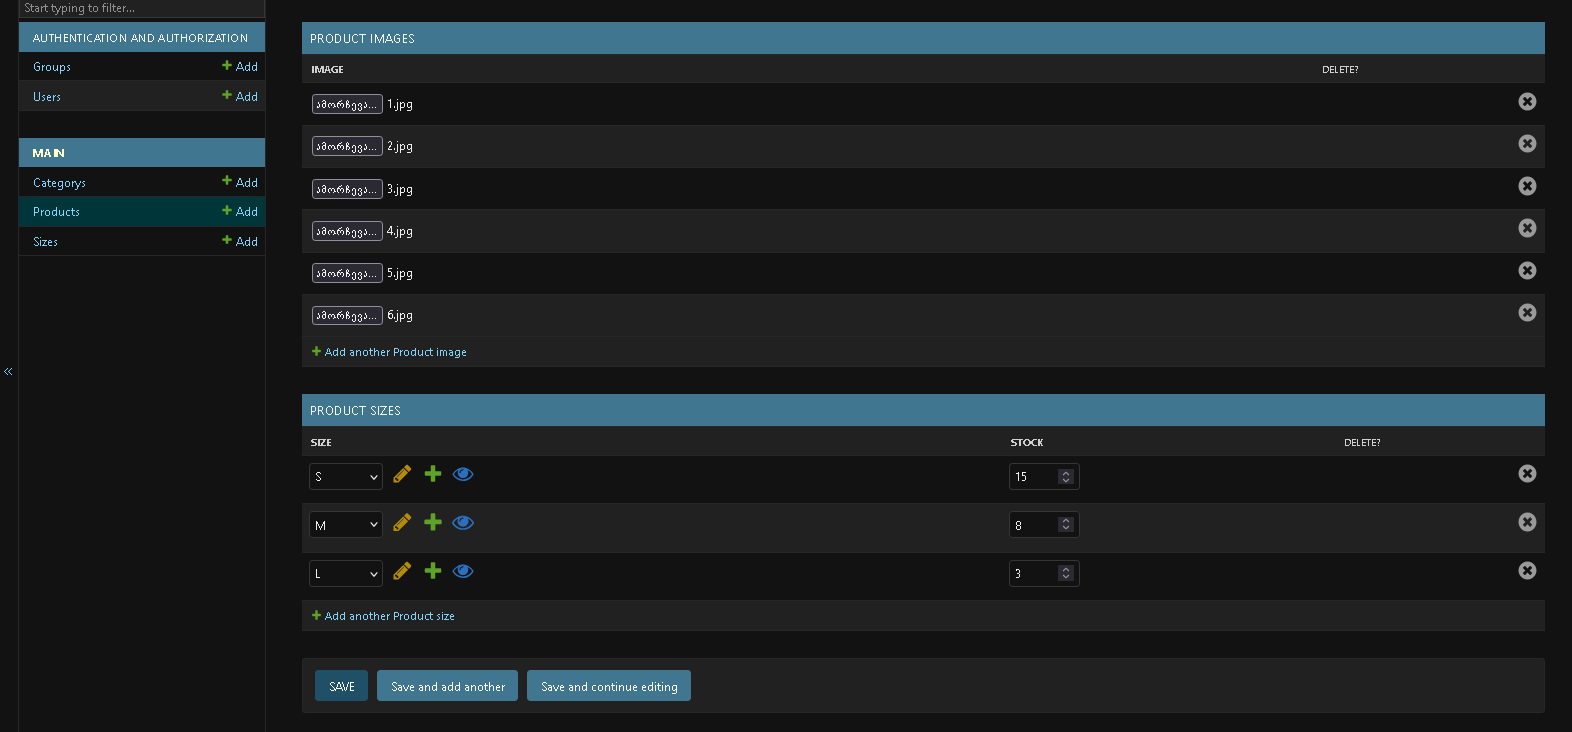

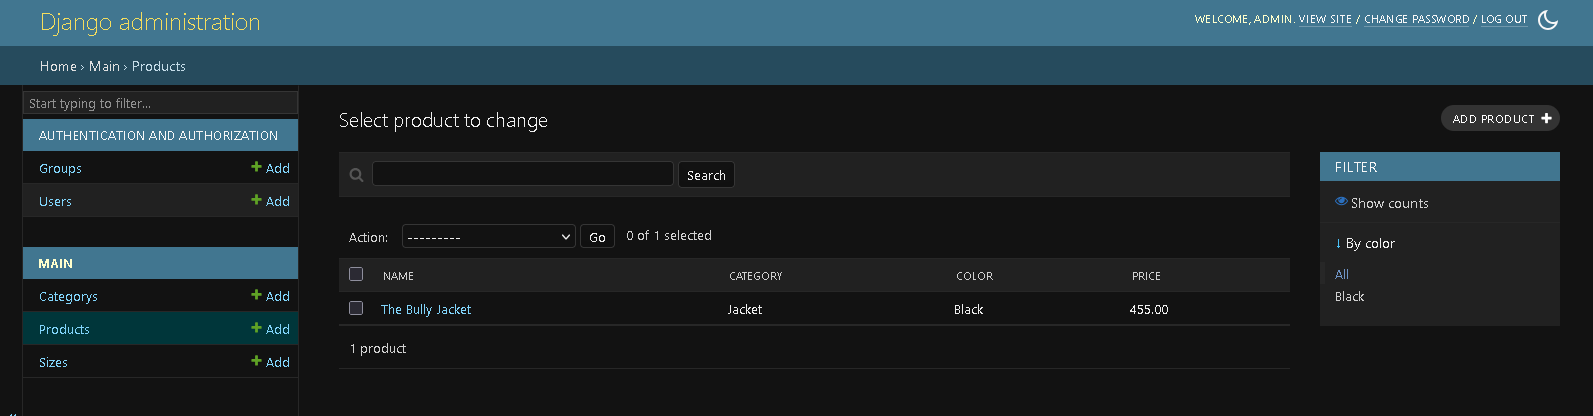

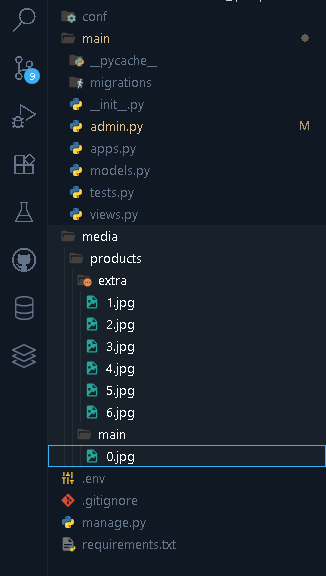

---

## ხედები – VIEWS

აქ გვექნება განსხვავებული მიდგომა:

შაბლონების შემთხვევაში სტანდარტულის მაგივრად გავაკეთებთ დინამიურს (იხ. `excalidraw.com  => 2_შაბლონები.excalidraw`). ასეთი მიდგომა ხედებსაც შეეხება (ცოტათი განსხვავებულ ხედებს დავწერთ).

`main/views.py`

```py
from django.shortcuts import get_object_or_404
from django.views.generic import TemplateView, DetailView
from django.http import HttpResponse
from django.template.response import TemplateResponse
from . models import Category, Product, Size
from django.db.models import Q    # ძებნის რეალიზაციისთვის


class IndexView(TemplateView):
  template_name = 'main/base.html'


  def get_context_data(self, **kwargs):
    context = super().get_context_data(**kwargs)
    context['categories'] = Category.objects.all()
    context['current_category'] = None

    return context


  def get(self, request, *args, **kwargs):
    context = self.get_context_data(**kwargs)

    if request.headers.get('HX-Request'):       # HTMX მოთხოვნის შემოწმება
      return TemplateResponse(request, 'main/home_content.html', context)
    
    return TemplateResponse(request, self.template_name, context)


class CatalogView(TemplateView):
  template_name = 'main/base.html'

  # პროდუქტების სორტირება
  FILTER_MAPPING = {
    'color': lambda queryset, value: queryset.filter(color__iexact=value),    # value: რის მიხედვით ვახდენთ სორტირებას
    'min_price': lambda queryset, value: queryset.filter(price__gte=value),
    'max_price': lambda queryset, value: queryset.filter(price__lte=value),
    'size': lambda queryset, value: queryset.filter(product_size__size__name=value),
  }


  def get_context_data(self, **kwargs):
    context = super().get_context_data(**kwargs)
    category_slug = kwargs.get('category_slug')                   # URL-იდან კატეგორიის slug (/catalog/shoes)
    categories = Category.objects.all()                           # ყველა კატეგორია
    products = Product.objects.all().order_by('-created_at')      # ყველა პროდუქტი (ახალიდან)
    current_category = None

    # კატეგორიის ფილტრაცია
    if category_slug:
      current_category = get_object_or_404(Category, slug=category_slug)
      products = products.filter(category=current_category)

    # ძებნის ფუნქციონალი
    query = self.request.GET.get('q')   # ძებნა ხორციელდება url-ზე მიმართვით (URL: ?q=nike)
    if query:
      products = products.filter(
        Q(name__icontains=query) | Q(description__icontains=query)
      )
    
    # დინამიური ფილტრების გამოყენება
    filter_params = {}
    
    for param, filter_func in self.FILTER_MAPPING.items():
      value = self.request.GET.get(param)           # URL parameter-ის მიღება

      if value:
        products = filter_func(products, value)     # ფილტრის გამოყენება
        filter_params[param] = value                # შენახვა template-ისთვის
      else:
        filter_params[param] = ''
      
    filter_params['q'] = query or ''                # ძებნა დამატებით

    # კონტექსტის დაკომპლექტება
    context.update(
      {
        'categories': categories,                   # ყველა კატეგორია ნავიგაციისთვის
        'products': products,                       # გაფილტრული პროდუქტები
        'current_category': category_slug,          # მიმდინარე კატეგორია
        'filter_params': filter_params,             # ყველა ფილტრი form values-ებისთვის
        'sizes': Size.objects.all(),                # size filter dropdown-ისთვიის
        'search_query': query or ''                 # ძებნის ტექსტი – search input
      }
    )

    # სპეციალური HTMX პარამეტრები / ლოგიკა
    if self.request.GET.get('show_search') == 'true':           # show_search=true → search input ველი
      context['show_search'] = True
    elif self.request.GET.get('reset_search') == 'true':        # reset_search=true → search ღილაკი (reset-ისთვის)
      context['reset_search'] = True

    return context


  def get(self, request, *args, **kwargs):
    context = self.get_context_data(**kwargs)

    if request.headers.get('HX-Request'):
      # HTMX-ის სხვადასხვა სცენარები
      if context.get('show_search'):      # ?show_search=true → search_input.html
        return TemplateResponse(request, 'main/search_input.html', context)
      elif context.get('reset_search'):   # ?reset_search=true → search_button.html
        return TemplateResponse(request, 'main/search_button.html', {})
      
      # ფილტრის მოდალი ან კატალოგი
      template = 'main/filter_modal.html' if request.GET.get('show_filters') == 'true' else 'main/catalog.html'
      # ?show_filters=true → filter.modal.html, სხვა ყველა შემთხვევა → catalog.html
    
      return TemplateResponse(request, template, context)

    return TemplateResponse(request, self.template_name, context)     # არა-HTMX → base.html


class ProductDetailView(DetailView):
  model = Product
  template_name = 'main/base.html'
  slug_field = 'slug'                   # რომელი ველით ვეძებთ მონაცემთა ბაზაში
  slug_url_kwarg = 'slug'               # URL-ის პარამეტრის სახელი


  def get_context_data(self, **kwargs):
    context = super().get_context_data(**kwargs)        # DetailView-ის context + product
    product = self.get_object()                         # მიმდინარე პროდუქტი
    context['categories'] = Category.objects.all()

    # მსგავსი პროდუქტები (იგივე კატეგორია, გარდა ამ პროდუქტისა, მხოლოდ 4 პროდუქტი)
    context['related_products'] = Product.objects.filter(category=product.category).exclude(id=product.id)[:4]
    context['current_category'] = product.category.slug

    return context
  

  def get(self, request, *args, **kwargs):
    context = self.get_context_data(**kwargs)
    self.object = self.get_object()               # პროდუქტის ობიექტი

    if request.headers.get('HX-Request'):
      return TemplateResponse(request, 'main/product_detail.html', context)

    raise TemplateResponse(request, self.template_name, context)
```
---